In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import ImageChops
from PIL import ImageOps
from PIL import ImageStat as stat

(424, 519) RGB


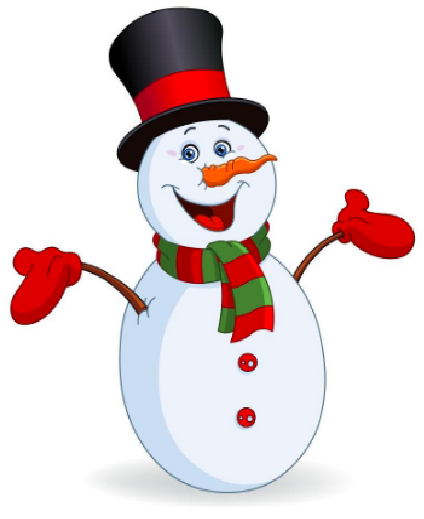

In [2]:
im = Image.open('balwan.png')
print(im.size, im.mode)
im

# Image.resize(size, resample=None, box=None, reducing_gap=None)

size – The requested size in pixels, as a 2-tuple: (width, height).

resample – An optional resampling filter:
Image.NEAREST (0), Image.LANCZOS (1), Image.BILINEAR (2), 
Image.BICUBIC (3), Image.BOX (4) or Image.HAMMING (5) 

box – An optional 4-tuple of floats providing the source image region to be scaled. 
The values must be within (0, 0, width, height) rectangle. 
If omitted or None, the entire source is used.

reducing_gap – Apply optimization by resizing the image in two steps. 
First, reducing the image by integer times using reduce(). 
Second, resizing using regular resampling. 
The last step changes size no less than by reducing_gap times. 
reducing_gap may be None (no first step is performed) or should be greater than 1.0. 
The bigger reducing_gap, the closer the result to the fair resampling. 
The smaller reducing_gap, the faster resizing. 
With reducing_gap greater or equal to 3.0, the result is indistinguishable from 
fair resampling in most cases. The default value is None (no optimization).

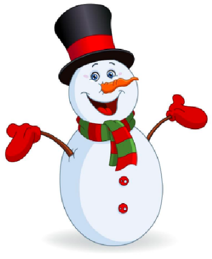

In [3]:
w,h = im.size
s_w = 0.5 # skala zmiany rozmiaru w 
s_h = 0.5 # skala zmiany rozmiaru h
w0 = int(w*s_w)
h0 = int(h*s_h)
im1 = im.resize((w0,h0), 3, reducing_gap = None) # domyśna metoda NEAREST
im1.save("balwan1.png")
im1

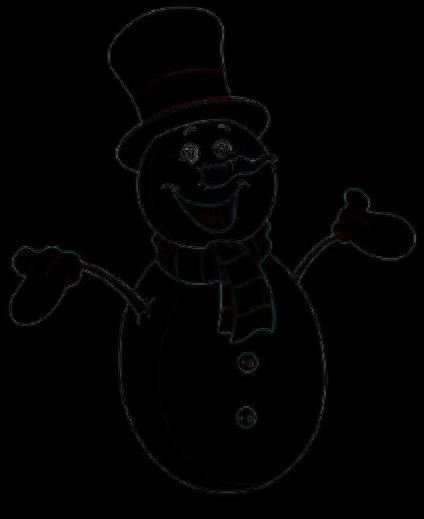

In [4]:
im2 = im1.resize((w,h), 3, reducing_gap = None)# domyśna metoda NEAREST
ImageChops.difference(im,im2)

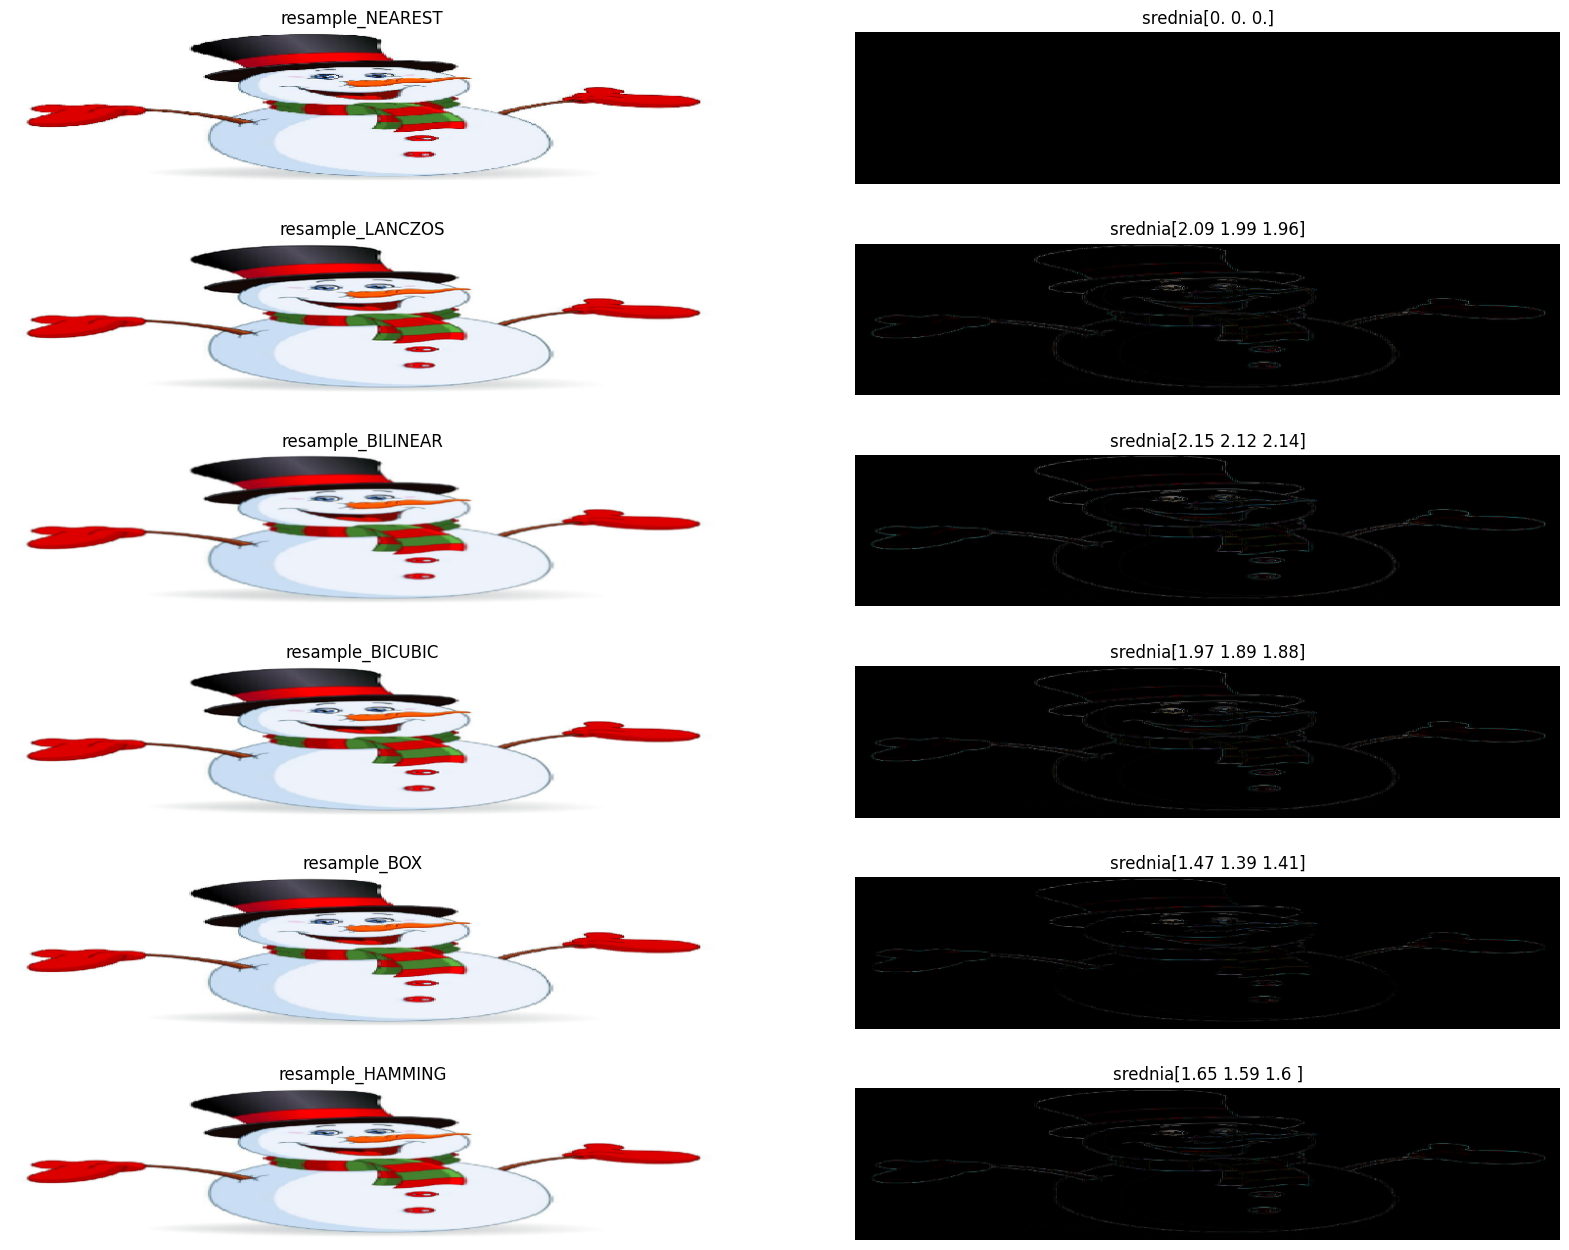

In [5]:
s_w = 1.7
s_h = 0.3
resample_method =['NEAREST','LANCZOS','BILINEAR','BICUBIC','BOX','HAMMING']
im_N = im.resize((int(w*s_w), int(h*s_h)), 0) 
plt.figure(figsize=(20, 16))
i=1
for t in range(6):
    file_name = "resample_"+ str(resample_method[t])
    im_r = im.resize((int(w*s_w), int(h*s_h)), t)
    plt.subplot(6, 2, i)
    plt.title(str(file_name))
    plt.imshow(im_r)
    plt.axis('off')
    i +=1
    diff=ImageChops.difference(im_N,im_r)
    s = stat.Stat(diff)
    plt.subplot(6, 2, i)
    plt.title('srednia' + str(np.round(s.mean, 2)))
    plt.imshow(diff)
    plt.axis('off')
    i +=1


# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)

In [6]:
# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)
# angle: It is the angle in degrees counterclockwise.
# resample: It is an optional input. It can be one of PIL.Image.NEAREST (use the nearest neighbor), PIL.Image.BILINEAR (linear interpolation in a 2×2 environment), or PIL.Image.BICUBIC (cubic spline interpolation in a 4×4 environment). If omitted, or if the image has mode “1” or “P,” it is set PIL.Image.NEAREST. See Filters.
# expand: It is an optional input. If set to True, the images expand and become large enough to hold the entire rotated image. If set to False, the output image is of the same size as of input image.
# center: It is an optional input. It set the center of image rotation. By default, it is the center of the image.
# translate: It is an optional input. It is a post-rotate translation.
# fillcolor: It is an optional input. It is a color for an area outside the rotated image.

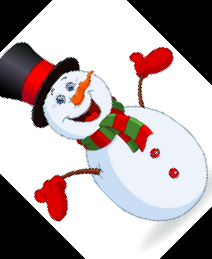

In [7]:
rot_45 = im1.rotate(45) # obrót o 45 stopni w lewo
rot_315 = im1.rotate(315) # obrót o 45 stopni w prawo = # obrót o 315 stopni w lewo
rot_45

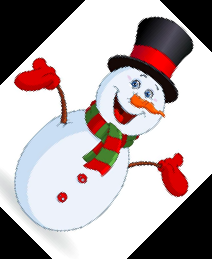

In [8]:
rot_315

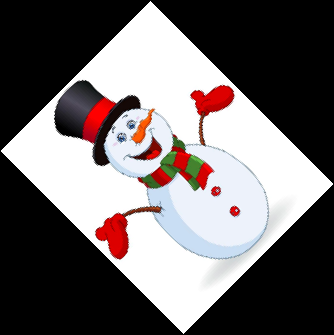

In [9]:
rot_45_exp = im1.rotate(45, expand=1) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
rot_45_exp

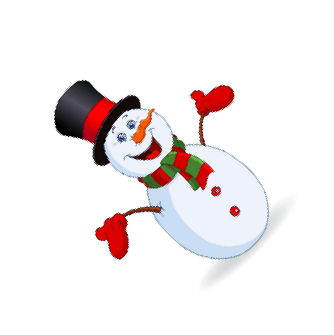

In [10]:
rot_45_exp_fill = im1.rotate(45, expand=1, fillcolor=(255,255,255)) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
# dodatkowe obszary, które musza powstac po obrocie zostały wypełnione kolorem białym
rot_45_exp_fill

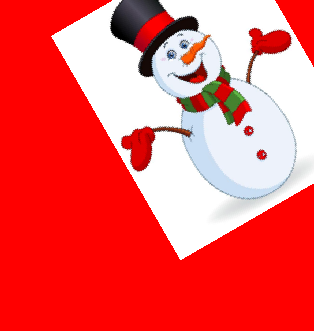

In [11]:
# obrót wokół punktu center domyslnie jest to obrót wokół srodka obrazu
rot_center = im1.rotate(30, expand=1, fillcolor=(255,0,0), center=(0,0)) # expand nie działa dobrze, gdy center nie jest środkiem obrazu
rot_center


# inne przekształcenia geometryczne
# im.transpose(Image.FLIP_LEFT_RIGHT)
# im.transpose(Image.FLIP_TOP_BOTTOM)
# im.transpose(Image.TRANSPOSE)
# im.transpose(Image.TRANSVERSE)

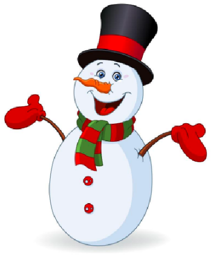

In [12]:
t1 = im1.transpose(Image.FLIP_LEFT_RIGHT)
t1


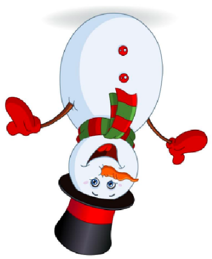

In [13]:
t2 = im1.transpose(Image.FLIP_TOP_BOTTOM)
t2




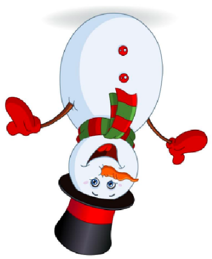

In [14]:
o1 = im1.rotate(180)
t2_1 = o1.transpose(Image.FLIP_LEFT_RIGHT)
t2_1
# o1


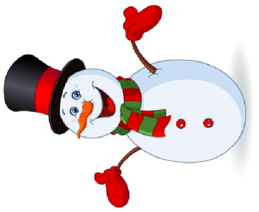

In [15]:
t3 = im1.transpose(Image.TRANSPOSE)
t3



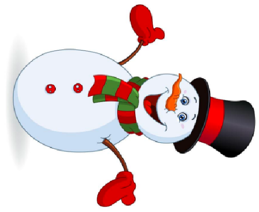

In [16]:
im1.transpose(Image.TRANSVERSE)